In [1]:
import matplotlib.pylab as plt
import numpy as np

# Transformada de Fourier

Se entiende que una transformada de fourier descompone una función en una suma infinita senos con las frecuencias principales (armonicos) de igual manera que un acorde se descompone en las notas que lo componen.

Tradicionalmente se define como una función integrable $f:\mathbb{R} \rightarrow\mathbb{C}$. Tradicionalmente se define de la siguiente forma:
$$f(x)=\int_{-\infty}^{\infty}f(x)e^{-2\pi ixft} dx$$

Siguiendo la lógica de la integral como una suma infinitesimal se puede abstraer una versión discreta de la misma cambiando la integral por una sumatoria a lo largo de un arreglo de la siguiente forma.

$$X[k]=\sum_{n=0}^{N-1} x[n]e^{-2\pi i kn/N}, 0<k<N$$
$n:$ Indice discreto de tiempo.  
$k:$ Indice discreto de frecuencia.  
$\omega_{k}=2\pi k/N:$ Frecuencia en radianes por segundo.  
$f_{k}=f_{s}k/N:$ Frecuencia en Hz ($f_{s}:$ tasa de muestreo)


In [124]:
def DFT(signal):
    X = np.array([])
    N = signal.size
    for k in range(N):
        s = np.exp(-2j * np.pi * k / N * np.arange(N))
        X = np.append(X, sum(signal*s))
    return X

In [125]:
def IDFT(spectrum):
    Y = np.array([])
    N = spectrum.size
    for k in range(N):
        s = np.exp(2j * np.pi * k / N * np.arange(N))
        Y = np.append(Y, 1.0/N * sum(spectrum*s))
    return Y

## Onda Sinusoidal Real

$$x[n]=Acos(2\pi fnT+\phi)$$

## Onda Sinusoidal Compleja

$$s_k[n]=e^{2\pi kn/N}=cos(2\pi kn/N)+i\, sin(2\pi kn/N)$$

In [126]:
A = 0.8
f0 = 1000
phi = np.pi/2
fs = 44100
t = np.arange (-0.002, 0.002, 1.0/fs)
real_signal = A * np.cos(2*np.pi *f0 * t + phi)

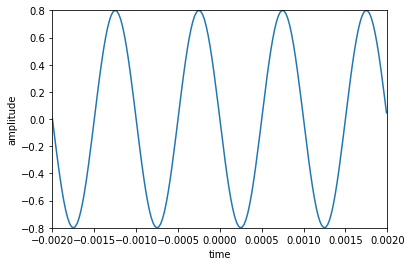

In [127]:
plt.plot(t,real_signal)
plt.axis([-0.002, 0.002, -0.8, 0.8])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

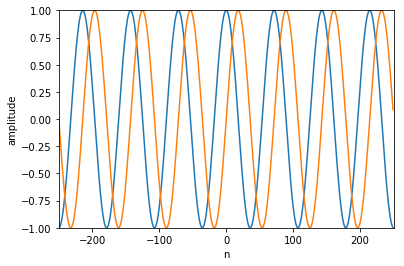

In [128]:
N = 500
k = 7

n = np.arange(-N/2, N/2)
complex_signal = np.exp(1j * 2* np.pi *k * n/N)

plt.plot(n, np.real(complex_signal))
plt.plot(n, np.imag(complex_signal))
plt.axis([-N/2, N/2, -1, 1])
plt.xlabel('n')
plt.ylabel('amplitude')
plt.show()

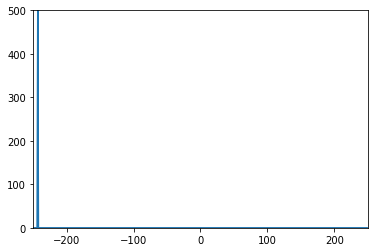

In [129]:
complex_spectrum = DFT(complex_signal)
size = complex_spectrum.size
plt.plot(np.arange(-size/2, size/2), abs(complex_spectrum))
plt.axis([-size/2, size/2, 0, size])
plt.show()

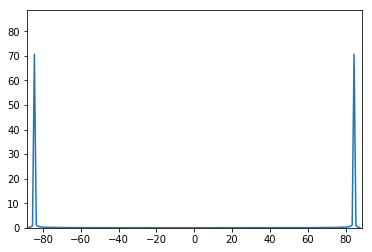

In [130]:
real_spectrum = DFT(real_signal)
size = real_spectrum.size
plt.plot(np.arange(-size/2, size/2), abs(real_spectrum))
plt.axis([-size/2, size/2, 0, size/2])
plt.show()

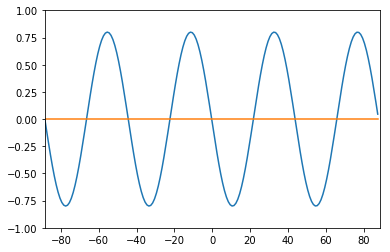

In [136]:
reconst_real = IDFT(real_spectrum)
size = reconst_real.size
plt.plot(np.arange(-size/2, size/2), np.real(reconst_real))
plt.plot(np.arange(-size/2, size/2), np.imag(reconst_real))
plt.axis([-size/2, size/2, -1, 1])
plt.show()

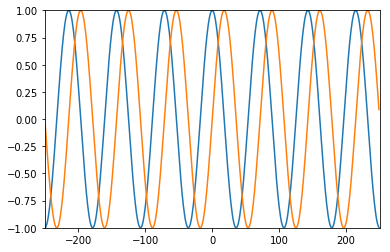

In [138]:
reconst_complex = IDFT(complex_spectrum)
size = reconst_complex.size
plt.plot(np.arange(-size/2, size/2), np.real(reconst_complex))
plt.plot(np.arange(-size/2, size/2), np.imag(reconst_complex))
plt.axis([-size/2, size/2, -1, 1])
plt.show()